# South Africa Languages Classification Challenge

## Honour Code
I **UBASINACHI, ELEONU**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).  

Non-compliance with the honour code constitutes a material breach of contract.

## Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, text which is in any of South Africa's 11 Official languages is taken to identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


![Loadshedding](https://github.com/Ubasinachi-Eleonu/Advanced-Classification-Hackathon/blob/c02ec9d92be59ccdc02f8eada58d3376c48e358b/South%20Africa%20Languages.jpg?raw=true)

[Image Source](https://www.kaggle.com/competitions/south-african-language-identification-hack-2022/overview)

<a id="cont"></a>
## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Dataset</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Kaggle Submission</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| First I imported, and briefly describe the libraries that will be used throughout our analysis and modelling. |

In [1]:
pip install wordcloud

In [2]:
# Regular libraries
import numpy as np
import pandas as pd 
import re
import csv
import nltk
import spacy
import string
import html 

# Libraries for visualization 
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
style.use('seaborn-poster')
from PIL import Image
from wordcloud import WordCloud

# Processing Packages
import en_core_web_sm
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.utils import resample
import string
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Libraries for Modeling
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Libraries for Model Evauluation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import warnings
warnings.simplefilter("ignore")

C:\Users\Ubasinachi\anaconda3\lib\site-packages\spacy\util.py:845: UserWarning: [W094] Model 'en_core_web_sm' (2.0.0) specifies an under-constrained spaCy version requirement: >=2.0.0a18. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.3.1,<3.4.0
  warnings.warn(warn_msg)


<a id="two"></a>
## 2. Loading Dataset

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing & Previewing Data ⚡ |
| :--------------------------- |
|Here I imported the given datasets (train, test and sample dataset) as sourced from [Kaggle](https://www.kaggle.com/competitions/south-african-language-identification-hack-2022/data). It is important to note that this dataset was first pushed to a Github repository from where it was then loaded to this notebook.

---

In [3]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')
df_sample = pd.read_csv('sample_submission.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploring the data for insights ⚡ |
| :--------------------------- |
| In this section, I performed an in-depth analysis of the variables in the DataFrame. |

---


In [4]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_train.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [6]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [7]:
df_test.tail()

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [14]:
df_sample.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [8]:
df_train.shape

(33000, 2)

In [9]:
df_test.shape

(5682, 2)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [11]:
df_train.dtypes

lang_id    object
text       object
dtype: object

In [13]:
df_test.dtypes

index     int64
text     object
dtype: object

In [16]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [17]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

In [18]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [22]:
print('The following distinct languages are present in the dataset:', df_train['lang_id'].unique())

The following distinct languages are present in the dataset: ['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


In [23]:
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [26]:
 df_train.duplicated().sum()

3052

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Engineering the dataset ⚡ |
| :--------------------------- |
| In this section we cleaned the dataset, and created new features - as identified in the EDA phase. |

---

### Dropping Duplicates

To ensure duplicate entries do not find it's way into the model, they were dropped.

In [27]:
df_train_v1 = df_train.drop_duplicates()

In [30]:
df_train_v1.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [28]:
df_train_v1['lang_id'].value_counts()

eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: lang_id, dtype: int64

<AxesSubplot:>

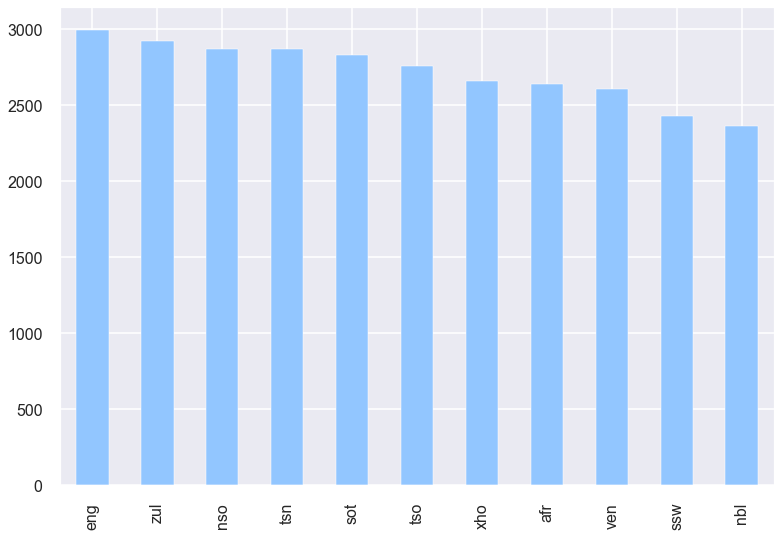

In [29]:
df_train_v1['lang_id'].value_counts().plot(kind='bar')

### Removing Puntuations

In [31]:
# Convert to lowercase
df_train_v1["text"] = df_train_v1["text"].str.lower()

In [32]:
# Output punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

In [35]:
df_train_v1['text'] = df_train_v1['text'].apply(remove_punctuation)

In [43]:
df_train_v1.head()

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


### Removing Numbers

In [37]:
def remove_numbers(text):
    return ''.join([l for l in text if not l.isdigit()])

In [38]:
df_train_v1['text'] = df_train_v1['text'].apply(remove_numbers)

In [41]:
df_train_v1.head(20)

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, I created five classification models that enable us to accurately classify the different south african languages. |

---



In [44]:
# Split the data set into train and test variables

X = df_train_v1['text'].values
y = df_train_v1['lang_id'].values


X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.25,
                                                     random_state=25)

In [45]:
# Logistic Regression model
log_reg = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC model
linear_svc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])

# Random Forest Classifier
ran_forest = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=100))])

# Naïve Bayes model
n_bayes = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# KNN Classifier model
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])


In [46]:
# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_Log = log_reg.predict(X_test)

# Linear Support vector classifier
linear_svc.fit(X_train, y_train)
y_pred_svc = linear_svc.predict(X_test)

# Random forest model
ran_forest.fit(X_train, y_train)
y_pred_RF = ran_forest.predict(X_test)

# Naive Bais model
n_bayes.fit(X_train, y_train)
y_pred_bayes = n_bayes.predict(X_test)


# KNN model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section I compared the relative performance of the various trained classification models on a holdout dataset. |

---

In [51]:
#create empty list to contain a dataframe of each of accuracy, precision, recall and f1 errors; 
#then concatenate the dataframes
result=[]
result.append(pd.DataFrame({'Model':['Logistic Regression','SVC','Random Forest','Naive Bayes', 'KNN']}))
result.append(pd.DataFrame({'Accuracy':[metrics.accuracy_score(y_test, y_pred_Log), metrics.accuracy_score(y_test, y_pred_svc), metrics.accuracy_score(y_test, y_pred_RF),metrics.accuracy_score(y_test, y_pred_bayes),metrics.accuracy_score(y_test, y_pred_knn)]}))
result.append(pd.DataFrame({'Precision':[metrics.precision_score(y_test, y_pred_Log, average='micro'), metrics.precision_score(y_test, y_pred_svc, average='micro'), metrics.precision_score(y_test, y_pred_RF, average='micro'),metrics.precision_score(y_test, y_pred_bayes, average='micro'),metrics.precision_score(y_test, y_pred_knn, average='micro')]}))
result.append(pd.DataFrame({'Recall':[metrics.recall_score(y_test, y_pred_Log, average='micro'), metrics.recall_score(y_test, y_pred_svc, average='micro'), metrics.recall_score(y_test, y_pred_RF, average='micro'),metrics.recall_score(y_test, y_pred_bayes, average='micro'),metrics.recall_score(y_test, y_pred_knn, average='micro')]}))
result.append(pd.DataFrame({'F1':[metrics.f1_score(y_test, y_pred_Log, average='micro'), metrics.f1_score(y_test, y_pred_svc, average='micro'), metrics.f1_score(y_test, y_pred_RF, average='micro'),metrics.f1_score(y_test, y_pred_bayes, average='micro'),metrics.f1_score(y_test, y_pred_knn, average='micro')]}))

result=pd.concat(result, axis=1)

result.set_index('Model', inplace= True)
print(result)

                     Accuracy  Precision    Recall        F1
Model                                                       
Logistic Regression  0.993188   0.993188  0.993188  0.993188
SVC                  0.997062   0.997062  0.997062  0.997062
Random Forest        0.807132   0.807132  0.807132  0.807132
Naive Bayes          0.998531   0.998531  0.998531  0.998531
KNN                  0.968479   0.968479  0.968479  0.968479


<a id="seven"></a>
## 7. Kaggle Submission

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Submission of output on Kaggle ⚡ |
| :--------------------------- |
| In this section, I used the test dataset to validate the model and converted the output to a csv file for submission. |

---

In [53]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [55]:
# Convert to lowercase
df_test['text'] = df_test["text"].str.lower()

In [56]:
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [58]:
df_test['text'] = df_test['text'].apply(remove_numbers)

In [60]:
df_test.head()

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu
3,4,kube inja nelikati betingevakala kutsi titsini...
4,5,winste op buitelandse valuta


In [61]:
y_pred = log_reg.predict(df_test['text'])

In [63]:
output = pd.DataFrame({'index': df_test['index'],
                      'lang_id': y_pred})


In [64]:
output.head()

,index,lang_id
0,1,ssw
1,2,nbl
2,3,ven
3,4,ssw
4,5,ssw


In [65]:
output.to_csv('ubasinachi_kaggle_submission.csv', index=False)